In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [79]:

# Load the dataset
data = pd.read_csv('PPG_Dataset.csv')


In [80]:

# Display basic information
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 2001 entries, 0 to Label
dtypes: float64(2000), object(1)
memory usage: 39.3+ MB
None


In [81]:

# Check for missing values and fill them with mean
if data.isnull().sum().sum() > 0:
    print("\nMissing Values Found. Filling with Mean...")
    data.fillna(data.mean(), inplace=True)


In [82]:

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])


In [83]:

# Save label encoder for decoding later
joblib.dump(label_encoder, 'label_encoder1.pkl')


['label_encoder1.pkl']

In [84]:

# Separate features and target variable
X = data.drop(columns=['Label'])  
y = data['Label']


In [85]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [86]:

# Save scaler for future use
joblib.dump(scaler, 'scaler1.pkl')



['scaler1.pkl']

In [87]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [88]:
print("Class distribution after SMOTE:", np.bincount(y_resampled))


Class distribution after SMOTE: [1294 1294]


In [89]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [90]:


# Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=10, class_weight='balanced_subsample', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [91]:

# Save the trained model
joblib.dump(model, 'best_ppg_model1.pkl')



['best_ppg_model1.pkl']

In [92]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) 

In [93]:
print("Unique labels in test set:", np.unique(y_test))
print("Unique predictions:", np.unique(y_pred))


Unique labels in test set: [0 1]
Unique predictions: [0 1]


In [94]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 96.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.96      0.97      0.96       252

    accuracy                           0.96       518
   macro avg       0.96      0.96      0.96       518
weighted avg       0.96      0.96      0.96       518



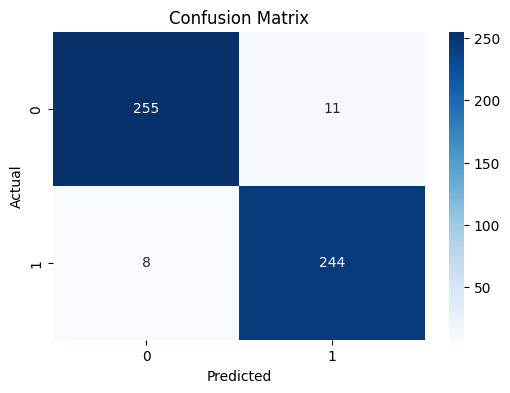

In [95]:

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [97]:
        
        # ----------- Load new.csv and predict a random sample -----------
        new_data = pd.read_csv('Normal.csv', encoding='utf-8-sig')
        
        # Fill missing values if any
        if new_data.isnull().sum().sum() > 0:
            new_data.fillna(new_data.mean(), inplace=True)
        
        # Ensure new data has same features
        new_features = new_data.drop(columns=['Label'], errors='ignore')  # Drop 'Label' if present
        new_features_scaled = scaler.transform(new_features)  # Scale the new data
        
        # Pick a random sample from new data
        random_index = np.random.randint(0, len(new_features_scaled))
        random_sample = new_features_scaled[random_index].reshape(1, -1)
        
        # Predict
        prediction = model.predict(random_sample)
        predicted_label = label_encoder.inverse_transform(prediction)[0]  # Convert back to original label
        
        # Print result
        print(f"\nRandomly Selected Sample Index: {random_index}")
        print(f"Predicted Condition: {predicted_label}")
        




Randomly Selected Sample Index: 1
Predicted Condition: Normal


Training Accuracy: 96.47%
Testing Accuracy: 96.33%


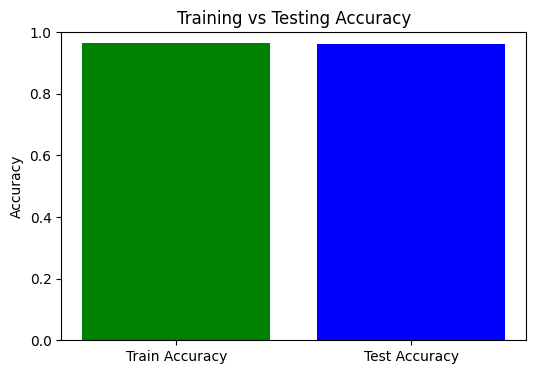

In [70]:
import matplotlib.pyplot as plt

# Get training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

# Print accuracy values
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy graph
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['green', 'blue'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure binary labels
y_test_binary = (y_test == 1).astype(int)

# Compute FPR, TPR
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_mi)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'MI (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for PPG Classification (MI vs. Normal)")
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_pred_proba_mi' is not defined